In [1]:
from tifffile import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
phc_good_path = "data/250129_HuH7_t100p000c000.tif"
fluor_good_path = "data/250129_HuH7_t100p000c001.tif"
phc_bubble_path = "data/250129_HuH7_t100p016c000.tif"
fluor_bubble_path = "data/250129_HuH7_t100p016c001.tif"

phc_good = imread(phc_good_path)
fluor_good = imread(fluor_good_path)
phc_bubble = imread(phc_bubble_path)
fluor_bubble = imread(fluor_bubble_path)

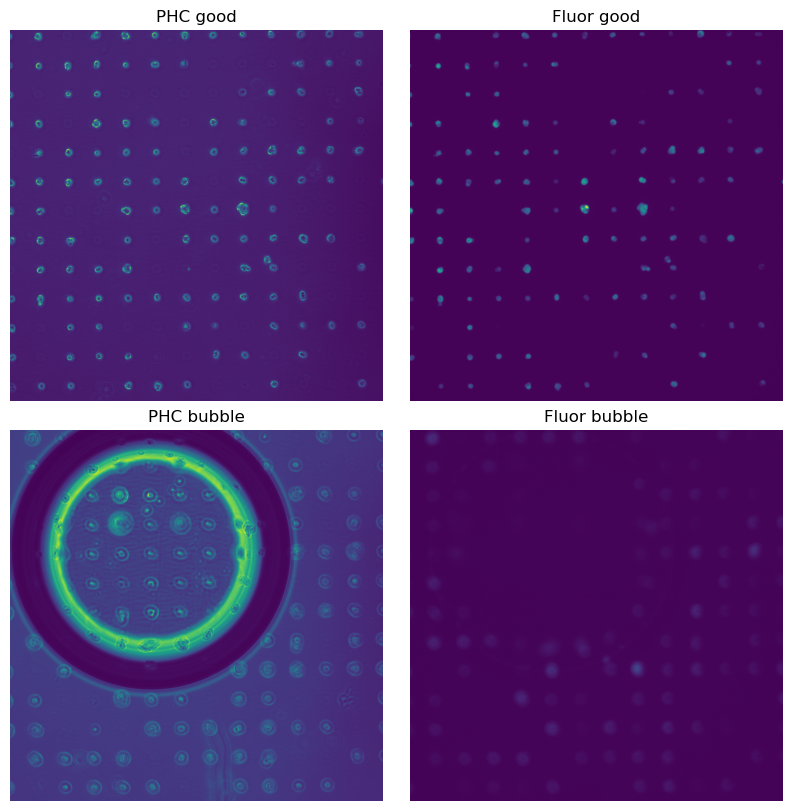

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)
axs[0, 0].imshow(phc_good)
axs[0, 0].set_title('PHC good')
axs[0, 1].imshow(fluor_good)
axs[0, 1].set_title('Fluor good')
axs[1, 0].imshow(phc_bubble)
axs[1, 0].set_title('PHC bubble' )
axs[1, 1].imshow(fluor_bubble)
axs[1, 1].set_title('Fluor bubble')
for ax in axs.flat:
    ax.axis('off')
plt.show()

In [4]:
from pyama_core.processing.segmentation import segment

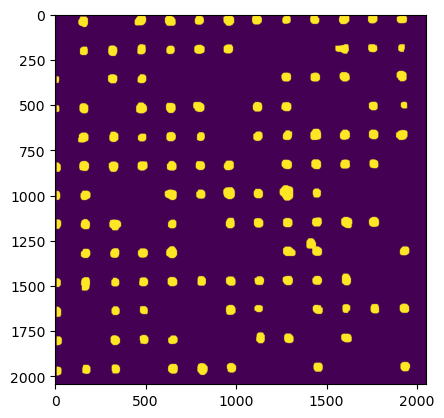

In [5]:
seg_good = np.empty_like(phc_good[None, ...], dtype=bool)
segment(phc_good[None, ...], seg_good)
plt.imshow(seg_good[0])
plt.show()

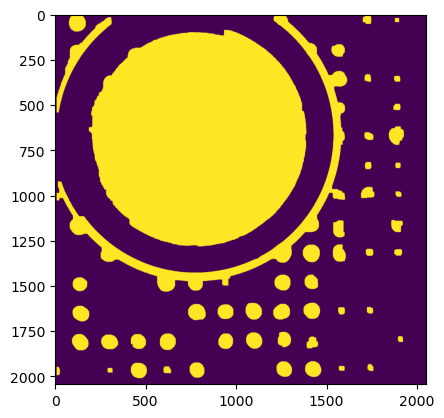

In [6]:
seg_bubble = np.empty_like(phc_bubble[None, ...], dtype=bool)
segment(phc_bubble[None, ...], seg_bubble)
plt.imshow(seg_bubble[0])
plt.show()

In [7]:
from pyama_core.processing.background import correct

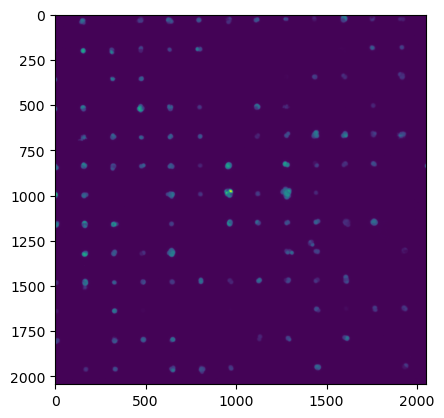

In [8]:
corrected_good = np.empty_like(fluor_good[None, ...], dtype=np.float16)
correct(fluor_good[None, ...], seg_good, corrected_good)
plt.imshow(corrected_good[0])
plt.show()

C:\Users\ctyja\workspace\own\pyama\pyama-core\src\pyama_core\processing\background\tile_interp.py:101: RuntimeWarning: All-NaN slice encountered
  support[y_idx, x_idx] = np.nanmedian(masked_image[slice_y, slice_x])


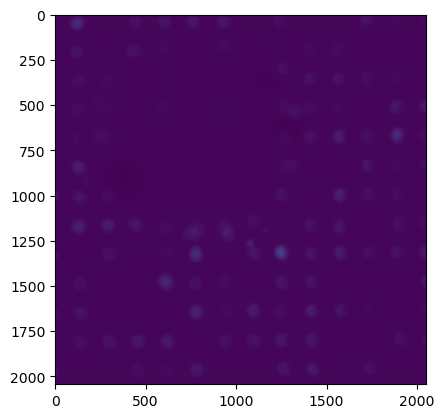

In [9]:
corrected_bubble = np.empty_like(fluor_bubble[None, ...], dtype=np.float16)
correct(fluor_bubble[None, ...], seg_bubble, corrected_bubble)
plt.imshow(corrected_bubble[0])
plt.show()